This notebook explore the publications related to Galaxy and microbial data analysis in the Galaxy Publication Library on Zotero

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import pprint
import re

from pyzotero import zotero

# Galaxy Publication Library

The Galaxy Project uses the Zotero social bookmarking service to organize publications that reference Galaxy. The Galaxy Group lists published articles, conference proceedings, theses, book chapters and books that use, extend, reference or implement Galaxy. 

In [2]:
ZOTERO_API = os.getenv('ZOTERO_API')

In [3]:
zot = zotero.Zotero('1732893', 'group', ZOTERO_API)

In this Galaxy Publication Library, the number of elements is:

In [4]:
element_nb = zot.count_items()
element_nb

22063

## Extract items based on keywords in tags, titles, and abstracts

The library makes extensive use of tags to categorize publications and enable smarter searching. But only papers added after the library was moved to Zotero in September 2017 have automatically added tags.

We extract items related to microbial data analysis by checking if their title, abstract, or tags contains any of following keywords:

In [5]:
searched_tags = [
    'bacteri', # bacteria, bacterio
    'prokaryot', # prokaryote, prokaryotic
    'microb', # microbiome, microbiota, microbial, microbiology, microbe
    'pathogen',
    'virus',
    'flora',
    'microecology',
    'microorganism', 'micro-organism', 
    'metabarcod', # metabarcode, metabarcoding
        '16s', '16 s',
        '18s',
        'amplicon',
        'metataxonom',
    'metagenom', # metagenome, metagenomic
    'metatranscriptom', # metatranscriptome, metatranscriptomic
    'metaproteom', # metaproteome, metaproteomic
    'multi-locus sequence typing', 'multilocus sequence typing', 'mlst',
    'otu'
]
searched_tags

['bacteri',
 'prokaryot',
 'microb',
 'pathogen',
 'virus',
 'flora',
 'microecology',
 'microorganism',
 'micro-organism',
 'metabarcod',
 '16s',
 '16 s',
 '18s',
 'amplicon',
 'metataxonom',
 'metagenom',
 'metatranscriptom',
 'metaproteom',
 'multi-locus sequence typing',
 'multilocus sequence typing',
 'mlst',
 'otu']

In [6]:
conserved_items = []
conserved_tags = set()
excluded_tags = set()
years = {}
for y in range(2005, 2024):
    years.setdefault(f'{y}', 0)

for item in zot.everything(zot.top()):
    # get year
    if 'date' in item['data']:
        match = re.match(r'.*(2[0-9]{3})', item['data']['date'])
        if match is not None:
            year = match.group(1)
            years[year] += 1
    
    to_add = False

    # search in tags
    for tag in item['data']['tags']:
        for st in searched_tags:
            if st in tag['tag'].lower():
                conserved_tags.add(tag['tag'].lower())
                to_add = True
            else:
                excluded_tags.add(tag['tag'].lower())

    # search in title and abstract
    for st in searched_tags:
        if 'title' in item['data'] and st in item['data']['title'].lower():
            to_add = True
        if 'abstractNote' in item['data'] and st in item['data']['abstractNote'].lower():
            to_add = True

    # keep item if found
    if to_add:
        conserved_items.append(item)

Text(0, 0.5, 'Publications in Galaxy Publication Library')

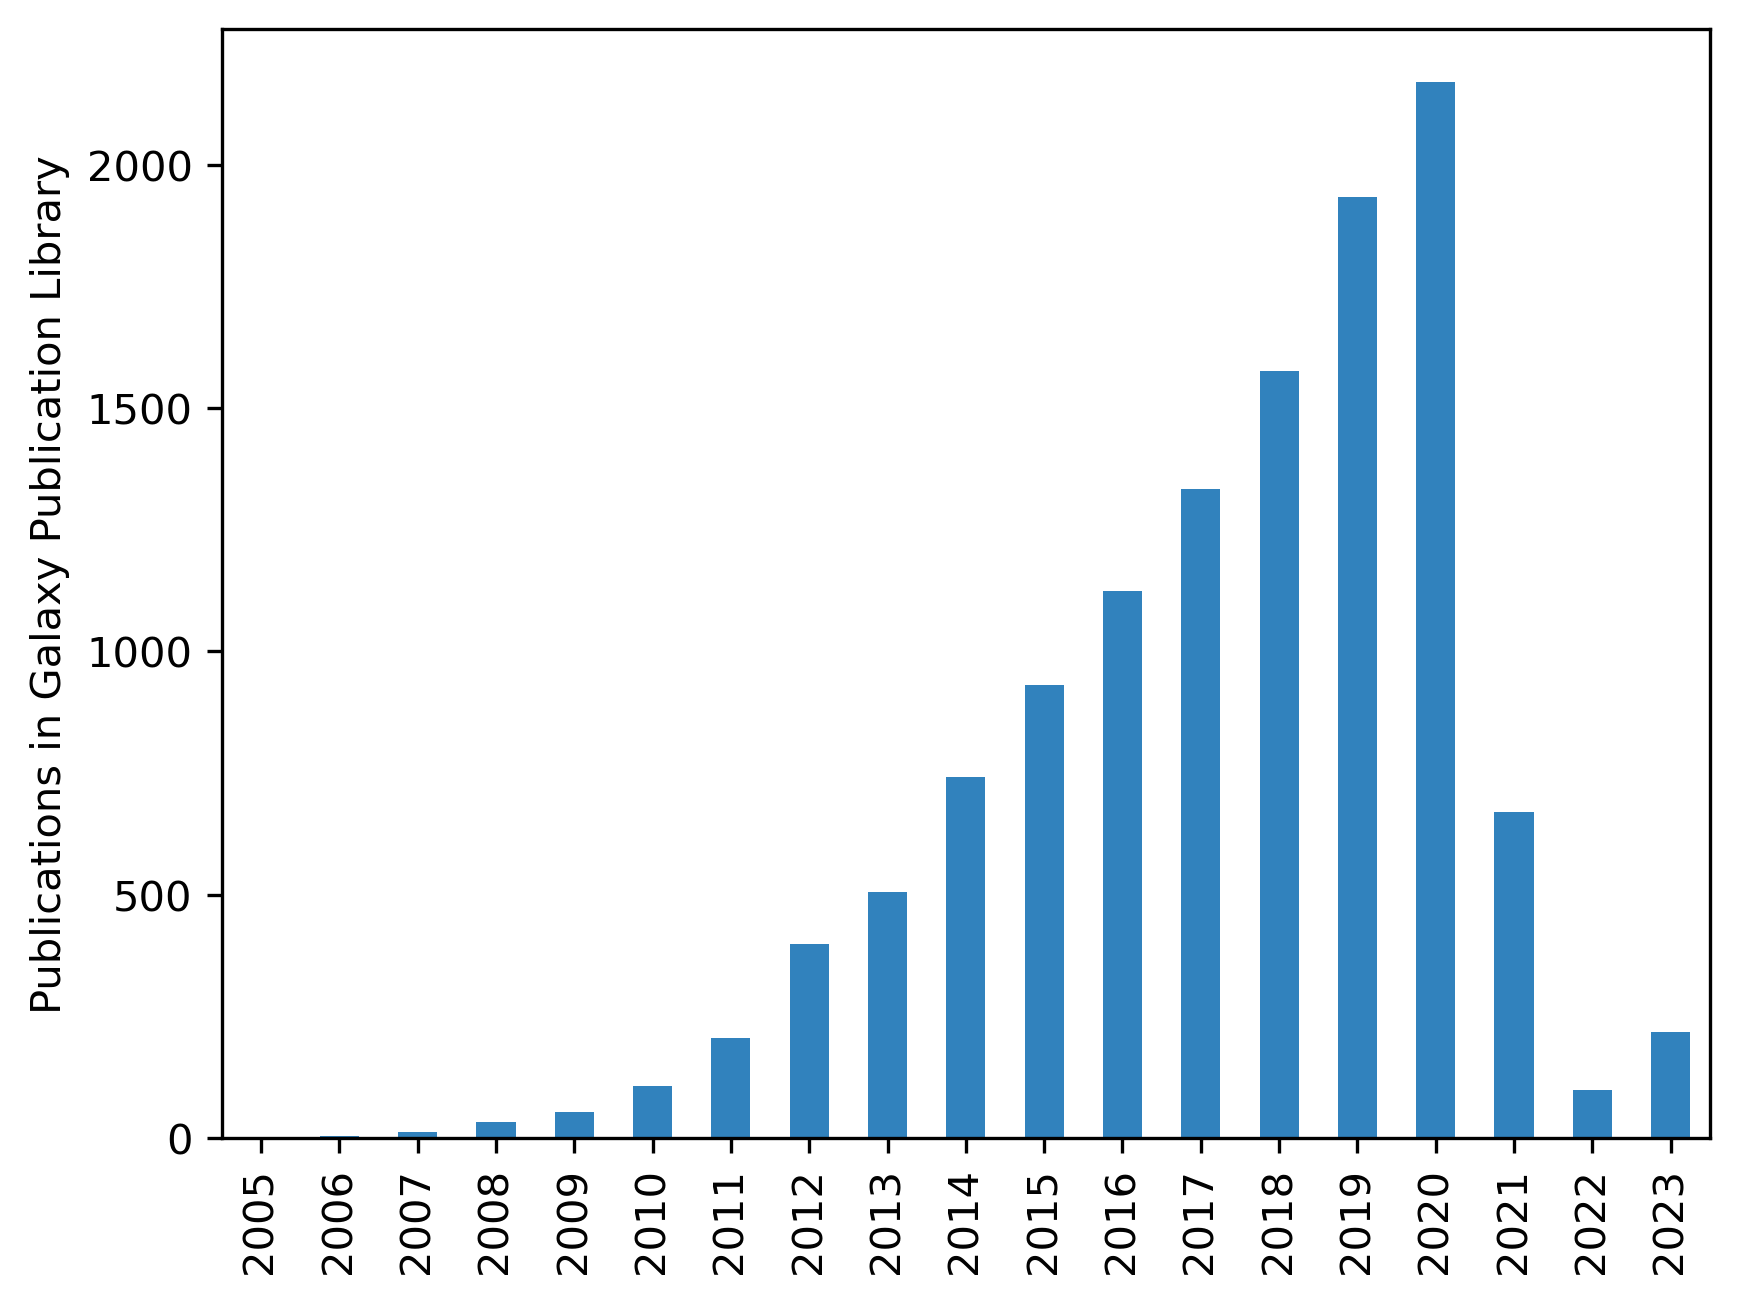

In [7]:
year_df = (pd.DataFrame.from_dict(years, orient='index')
           .rename(columns={0: "All"}))
fig, ax = plt.subplots()
fig.set_dpi(300)
(year_df
     .plot.bar(ax=ax, colormap='tab20c', legend=None))
plt.ylabel('Publications in Galaxy Publication Library')

Number and percentage of publications related to microbioal data analysis

In [8]:
conserved_element_nb = len(conserved_items)
print(f'{conserved_element_nb} {100 * conserved_element_nb/element_nb}')

4252 19.272084485337444


## Explore conserved items

### Per year

In [9]:
years = {}
for y in range(2005, 2024):
    years.setdefault(f'{y}', 0)

for item in conserved_items:
    match = re.match(r'.*(2[0-9]{3})', item['data']['date'])
    if match is not None:
        year = match.group(1)
        years[year] += 1

microbial_year_df = (pd.DataFrame.from_dict(years, orient='index')
    .rename(columns={0: "Microbial related"}))
year_df = year_df.join(microbial_year_df)
year_df

,All,Microbial related
2005,1,0
2006,4,0
2007,12,0
2008,32,1
2009,53,3
2010,107,10
2011,205,24
2012,398,69
2013,506,93
2014,741,148


In [14]:
year_df

,All,Microbial related
2005,1,0
2006,4,0
2007,12,0
2008,32,1
2009,53,3
2010,107,10
2011,205,24
2012,398,69
2013,506,93
2014,741,148


Text(0, 0.5, 'Publications in Galaxy Publication Library')

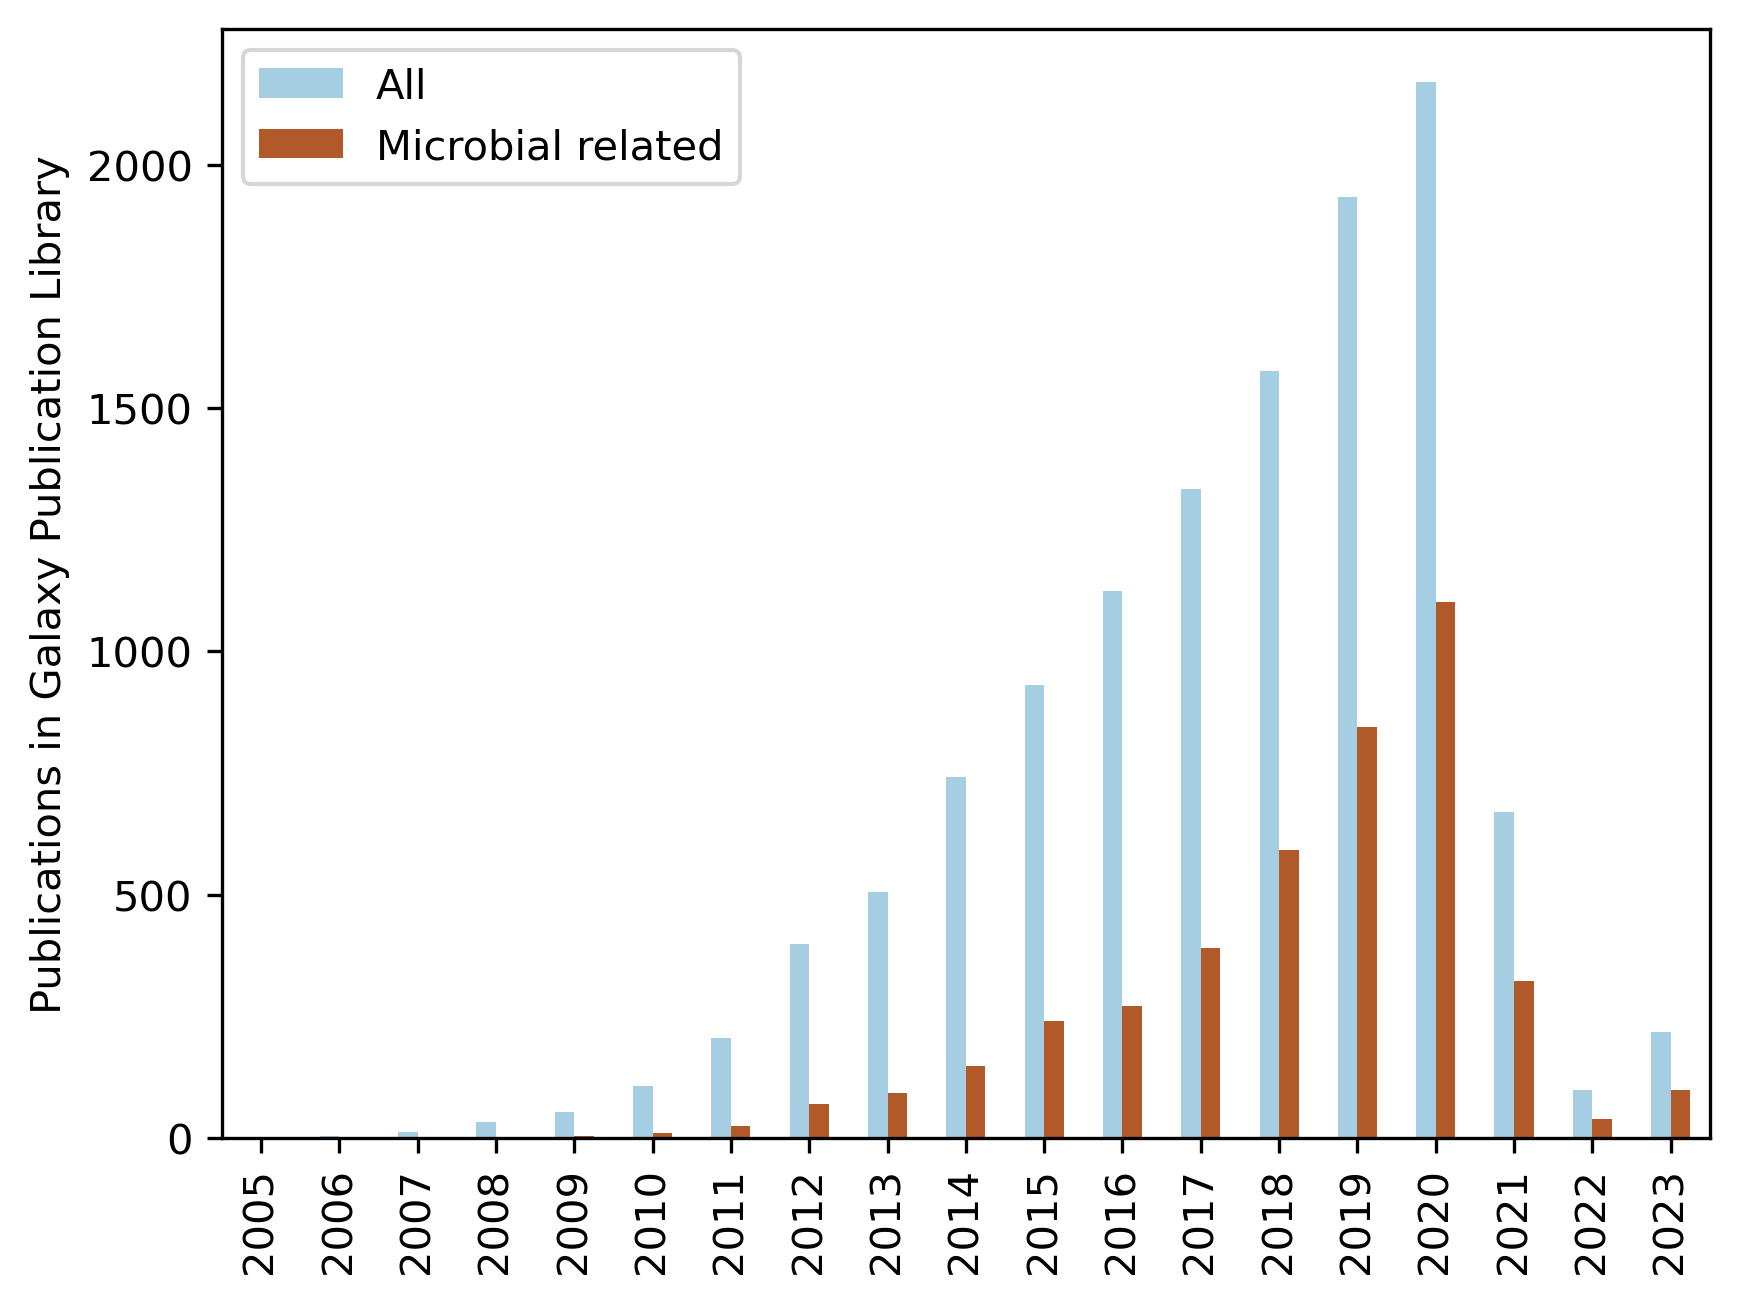

In [16]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(year_df
     .plot.bar(ax=ax, colormap='Paired'))
plt.ylabel('Publications in Galaxy Publication Library')

### Per tag

Kept tags

In [11]:
conserved_tags

{'16 s rrna sequencing',
 '16s',
 '16s  gene sequencing',
 '16s and its metagenomics',
 '16s function prediction',
 '16s metabarcoding',
 '16s rdna',
 '16s rdna amplicon sequencing',
 '16s rdna diversity',
 '16s rdna gene metabarcoding',
 '16s rdna high-throughput sequencing',
 '16s rdna sequencing',
 '16s ribosomal rna gene',
 '16s rna',
 '16s rna sequencing',
 '16s rrna',
 '16s rrna amplicon',
 '16s rrna amplicon sequencing',
 '16s rrna amplicon sequencing - microbiome analysis - microbiome - microbiome composition - next generation sequencing platforms',
 '16s rrna gene',
 '16s rrna gene amplicon',
 '16s rrna gene amplicon sequencing',
 '16s rrna gene high-throughput sequencing',
 '16s rrna gene metabarcoding',
 '16s rrna gene metabarcoding.',
 '16s rrna gene pyrosequencing',
 '16s rrna gene sequence',
 '16s rrna gene sequencing',
 '16s rrna genes',
 '16s rrna genes sequencing',
 '16s rrna ngs',
 '16s rrna sequence',
 '16s rrna sequencing',
 '16s sequencing',
 '16s/18s rrna gene',
 

To do:
- Re-extract tags in conserved items
- Group them by topics